# Import data from csv

In [28]:
import pandas as pd
import numpy as np


filename = "california_housing_train.csv"
df = pd.read_csv(filename)
print(df)

# x = num bedrooms = totalbedrooms/households
# y = median house value

x = np.array(df["total_bedrooms"] / df["households"])


y = np.array(df["median_house_value"])





       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

# Define helper functions

In [29]:
def MSE(x,y,b,w1):
    """
    Find the Mean Squared Error between true outputs and predicted outputs
    Inputs: x - list, the input feature values
            y - list, the true output values
            b - float/int, bias
            w1 - float/int, weight

    Outputs: MSE - float
    """
    m = len(x)
    total_loss = 0
    for i in range(m):
        total_loss = total_loss + (y[i] - (b + w1 * x[i])) ** 2
    return total_loss/m #MSE

def update_bias_weights(x, y, b, w1, alpha):
    """
    Update the bias and weights based on Gradient Descent 
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight   
            alpha - float, the learning rate used in Gradient Descent
    Outputs: 
            (b, W1) - tuple, the updated bias and weights    
    """
    m = len(x)
    db = 0
    dw1 = 0
    for i in range(m):
        db  = db  + 2 * (y[i] - (b + w1 * x[i])) * (-1)
        dw1 = dw1 + 2 * (y[i] - (b + w1 * x[i])) * (-x[i])

    db = db / m
    dw1 = dw1 / m

    # subtract due to the derivatives pointing in the direction of steepest ascent (pos gradient)
    b = b - db * alpha
    w1 = w1 - dw1 * alpha

    return (b, w1)

def max_min_norm(X):
    """
    Normalize dataset by using the Max-min normalization technique
    Inputs: X - numpy.ndarray, the dataset for normalization
    Outputs: (X_norm, np.array(max_min_vals)) - tuple, return the normalized dataset, 
                                            and the max and min values of each feature
    """
    X_norm = X.copy().astype(float)
    max_min_vals = []
    for col in range(0, X_norm.shape[1]):
        X_max = X_norm[:, col].max()
        X_min = X_norm[:, col].min()
        X_range = X_max - X_min
        X_norm[:, col] = (X_norm[:, col] - X_min) / X_range
        max_min_vals.append({"X_max":X_max, "X_min":X_min, "X_range":X_range})
    return (X_norm, np.array(max_min_vals))

# Training function

In [30]:
def train(x, y, b, w1, alpha, iterations):
    """
    Train linear regression model for the specified iterations
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight 
            learning_rate - float, the learning rate used in Gradient Descent
            learning_iterations - int, the number of times of training
    Outputs: 
            (loss_history, b, W) - tuple, return loss_history and final parameters 
    """
    lHistory = []

    for i in range(iterations):
        b, w1 = update_bias_weights(x,y,b,w1,alpha)

        # find MSE after each iteration of updating the bias and weights
        loss = MSE(x,y,b,w1)
        lHistory.append(loss)

        if i < 5 or i >= iterations - 5:
            print("iter={:d} \t b={:.5f} \t W1={:.5f} \t MSE={}".format(i+1, b, w1, loss))
    return (lHistory, b, w1)  

# do it

In [ ]:
initial_b = 0
initial_w1 = 0

alpha = 0.01
ite = 1000 # 2000 was really close to sklearn


lHist, b , w1 = train(x, y, initial_b, initial_w1, alpha, ite)

iter=1 	 b=4146.01825 	 W1=4497.54192 	 MSE=52770679365.37974
iter=2 	 b=8110.41479 	 W1=8774.28089 	 MSE=49449306926.38205
iter=3 	 b=11901.66772 	 W1=12840.57594 	 MSE=46430540012.69223
iter=4 	 b=15527.85823 	 W1=16706.30101 	 MSE=43686710293.481186
iter=5 	 b=18996.68920 	 W1=20380.86769 	 MSE=41192679657.762596
iter=1996 	 b=216881.16863 	 W1=-8945.39861 	 MSE=13424294037.349154
iter=1997 	 b=216885.87581 	 W1=-8949.25021 	 MSE=13424290341.890549
iter=1998 	 b=216890.57338 	 W1=-8953.09394 	 MSE=13424286661.517998
iter=1999 	 b=216895.26134 	 W1=-8956.92982 	 MSE=13424282996.169601
iter=2000 	 b=216899.93973 	 W1=-8960.75785 	 MSE=13424279345.78439


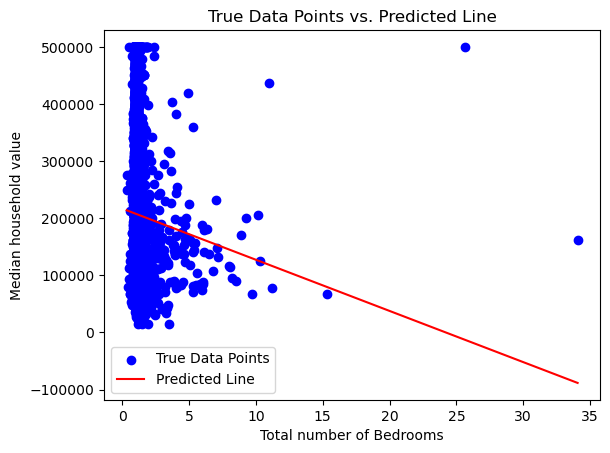

In [32]:
import matplotlib.pyplot as plt
# Plot the true data points and predicted line
plt.scatter(x, y, color='blue', label='True Data Points')
X_pred = np.linspace(min(x), max(x), 100)  # Generate points for the line
Y_pred = b + w1 * X_pred                  # Predicted values
plt.plot(X_pred, Y_pred, color='red', label='Predicted Line')

plt.xlabel('Total number of Bedrooms')
plt.ylabel('Median household value')
plt.title('True Data Points vs. Predicted Line')
plt.legend()
plt.show()

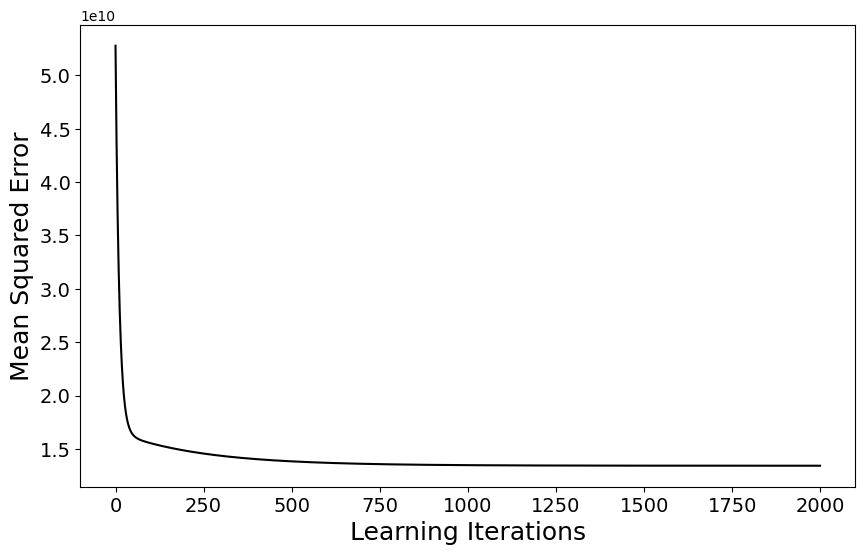

In [33]:
new_data = np.array([[3]], dtype = float) 
    
# Use the final bias and weights values
predicted_price = b + w1*new_data[0][0] 

itr = list(range(0, ite))
fig = plt.figure(figsize = (10, 6))
plt.xlabel('Learning Iterations', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(itr[:], lHist[:], color='black')
# plt.savefig('MSE_LREG_1000.jpg', dpi=600)
plt.show()

# do the LR

In [34]:
from sklearn.linear_model import LinearRegression

xLR = x.reshape(-1,1)


reg = LinearRegression().fit(xLR,y)


print(f"The optimal bias found by me: {np.round(b,5)}")
print(f"The optimal weights found by me: {np.round(w1,5)}")

print(f"The optimal bias found by sklearn: {np.round(reg.intercept_,5)}")
print(f"The optimal weights found by sklearn: {np.round(reg.coef_,5)}")
new_data = np.array([[3]], dtype = float) 

print(f"My predicted value {np.round(b + w1 * new_data[0][0])}")

print(f"sklearn predicted value {np.round(reg.predict(new_data),3)}")

The optimal bias found by me: 216899.93973
The optimal weights found by me: -8960.75785
The optimal bias found by sklearn: 219184.96166
The optimal weights found by sklearn: [-10830.45277]
My predicted value 190018.0
sklearn predicted value [186693.603]


# Multi variable

In [37]:
def MSE_multi(X, Y, b, W1, W2): # Mean Squared Error
    """
    Find the Mean Squared Error between true outputs and predicted outputs
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight for the 1st feature (i.e., size_sqft)
            W2 - float/int, weight for the 2nd feature (i.e., num_bedrooms)
    Outputs: MSE - float
    """
    X1 = [val[0] for val in X]
    X2 = [val[1] for val in X]
    m = len(X)
    total_loss = 0
    for i in range(m):
        total_loss = total_loss + (Y[i] - (b + X1[i]*W1 + X2[i]*W2))**2
    MSE = total_loss / m
    return MSE


def update_bias_weights_multi(X, Y, b, W1, W2, learning_rate):
    """
    Update the bias and weights based on Gradient Descent 
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight for the 1st feature (i.e., size_sqft)
            W2 - float/int, weight for the 2nd feature (i.e., num_bedrooms)
            learning_rate - float, the learning rate used in Gradient Descent
    Outputs: (b, W1, W2) - tuple, the updated bias and weights
    """
    X1 = [val[0] for val in X]
    X2 = [val[1] for val in X]
    m = len(X)
    dL_dW1 = 0
    dL_dW2 = 0
    dL_db  = 0
    
    for i in range(m):     
        dL_db  = dL_db  + 2 * (Y[i] - (b + X1[i]*W1 + X2[i]*W2)) * (-1)
        dL_dW1 = dL_dW1 + 2 * (Y[i] - (b + X1[i]*W1 + X2[i]*W2)) * (-X1[i])
        dL_dW2 = dL_dW2 + 2 * (Y[i] - (b + X1[i]*W1 + X2[i]*W2)) * (-X2[i])
            
    dL_db  = dL_db/m
    dL_dW1 = dL_dW1/m
    dL_dW2 = dL_dW2/m
    
    # We subtract because the derivatives point in direction of steepest ascent
    b  = b  - dL_db  * learning_rate
    W1 = W1 - dL_dW1 * learning_rate 
    W2 = W2 - dL_dW2 * learning_rate
    
    return (b, W1, W2)

def train_multi(X, Y, b, W1, W2, learning_rate, learning_iterations):
    """
    Train linear regression model for the specified iterations
    Inputs: X - list, the input feature values
            Y - list, the true output values
            b - float/int, bias
            W1 - float/int, weight for the 1st feature (i.e., size_sqft)
            W2 - float/int, weight for the 2nd feature (i.e., num_bedrooms)
            learning_rate - float, the learning rate used in Gradient Descent
            learning_iterations - int, the number of times of training
    Outputs: (loss_history, b, W1, W2) - tuple, return the loss_history, and 
                                                the final bias and weights
    """
    loss_history = []

    for i in range(learning_iterations):
        b, W1, W2 = update_bias_weights_multi(X, Y, b, W1, W2, learning_rate)
        
        # find MSE after the ith iteration of updating bias and weights
        loss = MSE_multi(X, Y, b, W1, W2)
        loss_history.append(loss)
        
        if i < 5 or i >= learning_iterations-5:
            print ("iter={:d} \t b={:.5f} \t W1={:.5f} \t W2={:.5f} \t MSE={}".format(i+1, b, W1, W2, loss))
    return (loss_history, b, W1, W2)


def max_min_norm_multi(X):
    """
    Normalize dataset by using the Max-min normalization technique
    Inputs: X - numpy.ndarray, the dataset for normalization
    Outputs: (X_norm, np.array(max_min_vals)) - tuple, return the normalized dataset, 
                                            and the max and min values of each feature
    """
    X_norm = X.copy().astype(float)
    max_min_vals = []
    for col in range(0, X_norm.shape[1]):
        X_max = X_norm[:, col].max()
        X_min = X_norm[:, col].min()
        X_range = X_max - X_min
        X_norm[:, col] = (X_norm[:, col] - X_min) / X_range
        max_min_vals.append({"X_max":X_max, "X_min":X_min, "X_range":X_range})
    return (X_norm, np.array(max_min_vals))

In [42]:
# x1 = num bedrooms
# x2 = housing median age
# y = median hosue value


x1 = np.array(df["total_bedrooms"] / df["households"])
x2 = np.array(df["housing_median_age"])
x = np.column_stack((x1,x2))

y = np.array(df["median_house_value"])

x, max_min_vals = max_min_norm_multi(x)

x = x.tolist()
y = y.tolist()

initial_b = 0
initial_w1 = 0
initial_w2 = 0

alpha = 0.01
learning_iterations = 100

lHist, b, w1, w2 = train_multi(x,y,initial_b,initial_w1, initial_w2, alpha, learning_iterations)


iter=1 	 b=4146.01825 	 W1=92.35778 	 W2=2303.97739 	 MSE=54203903347.70579
iter=2 	 b=8184.14675 	 W1=182.28405 	 W2=4546.78379 	 MSE=52097333457.6012
iter=3 	 b=12117.20624 	 W1=269.84237 	 W2=6730.01963 	 MSE=50099483972.140816
iter=4 	 b=15947.94367 	 W1=355.09464 	 W2=8855.24347 	 MSE=48204743375.4224
iter=5 	 b=19679.03420 	 W1=438.10115 	 W2=10923.97315 	 MSE=46407789786.22238
iter=96 	 b=147273.61092 	 W1=3214.91042 	 W2=79110.77008 	 MSE=13643909203.099861
iter=97 	 b=147616.77337 	 W1=3221.55216 	 W2=79261.17280 	 MSE=13630048373.91572
iter=98 	 b=147951.44231 	 W1=3228.00231 	 W2=79406.79762 	 MSE=13616895575.501019
iter=99 	 b=148277.83938 	 W1=3234.26588 	 W2=79547.77027 	 MSE=13604414277.06372
iter=100 	 b=148596.18044 	 W1=3240.34773 	 W2=79684.21318 	 MSE=13592569833.298727


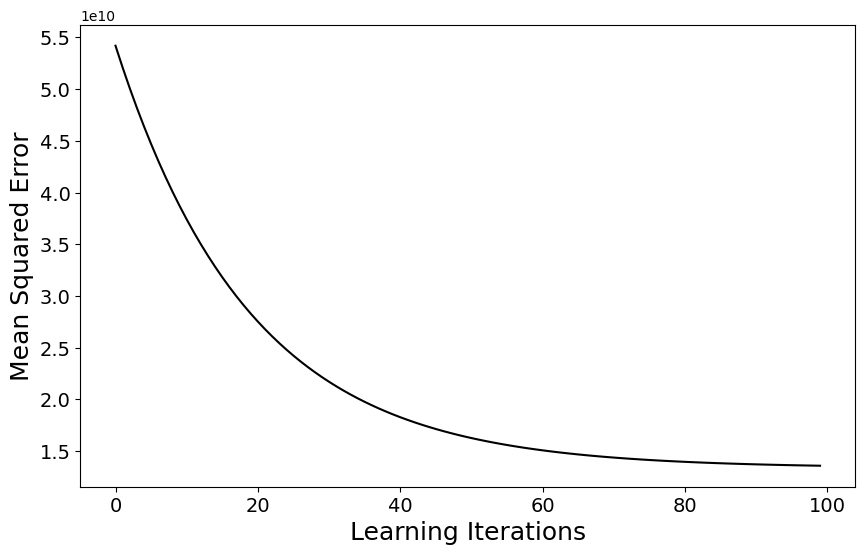

In [43]:
import matplotlib.pyplot as plt

itr = list(range(0, learning_iterations))
fig = plt.figure(figsize = (10, 6))
plt.xlabel('Learning Iterations', fontsize=18)
plt.ylabel('Mean Squared Error', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.plot(itr[:], lHist[:], color='black')
# plt.savefig('MSE_LREG_1000.jpg', dpi=600)
plt.show()

In [47]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)

reg = LinearRegression().fit(x,y)

print(f"My predicted value {np.round(b + w1*x[0][0] + w2*x[0][1])}")

print(f"sklearn predicted value {np.round(reg.predict(x),3)}")



My predicted value 170699.0
sklearn predicted value [179690.336 171027.819 192689.976 ... 195595.548 197598.159 229599.294]
